Locally Weighted Regression (LWR) is an algorithm that's very similar to Linear Regression \
but the main difference is that each point being compared to the new point to predict \
is compared and it uses the distance to add "weight" for the cost function. \
The cost function is very similar to linear regression. \
Here's are the equations for comparison (J(\theta)) \
Linear Regression
$$J(\theta) = \frac{1}{m} * \sum_{i=0}^{m}\left(y^{(i)} - \theta^{T}x\right)^{2}$$
Locally Weighted Regression
$$J(\theta) = \frac{1}{m} * \sum_{i=0}^{m} w^{(i)}\left(y^{(i)} - \theta^{T}x\right)^{2}$$
where $w^{(i)}$ is a function for determining weights based on the distance of $x$ (the point to predict) \
and $x^{(i)}$ represents the feature vector of the i-th data point in the dataset, and $x$ represents the feature vector to be predicted.\
Generally $w^{(i)}$ is
$$w^{(i)} = \exp\left(-\frac{||x^{(i)} - x||^{2}}{2\tau^{2}}\right)$$
where $\tau$ represents the bandwidth (it controls whether it allows overfitting, or underfiting). \
$|| \cdot ||$ represents the euclidean distance. \
Interestingly, if $||x^{(i)} - x||$ is small, $w^{(i)} \approx 1$ while \
if $||x^{(i)} - x||$ is large, $w^{(i)} \approx 0$. Preserving the locallity property of LWR. \
Finding the closed form by taking the dervitative of the cost function in the matrix form, we get
$$\theta = (X^{T}WX)^{-1}X^{T}WY$$
where $X$, and $Y$ are the entire input and output dataset respectively. W is the diagonal matrix containing $w^{(i)}$ weights
\begin{matrix}
w^{(1)} & 0 & \cdots & 0 \\
0 & w^{(2)} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & w^{(m)}
\end{matrix}
The issue with the algorithm as you might have noticed is the fact that it requires of some inverse matrices to exist for it to work.


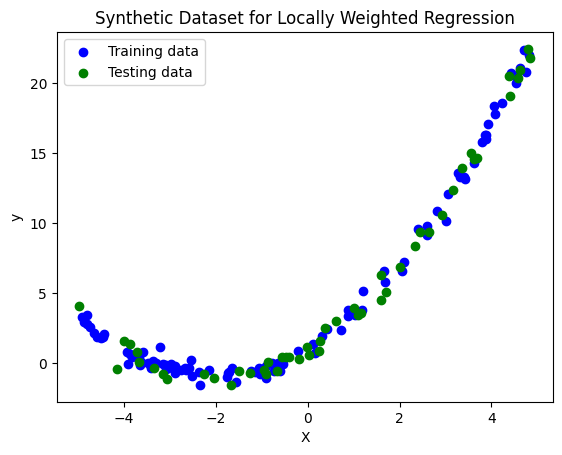

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def generate_datasets(n_train=100, n_test=50, noise=0.1):

    # Generate random input features for training and testing

    X_train = np.random.uniform(-5, 5, size=(n_train, 1))

    X_test = np.random.uniform(-5, 5, size=(n_test, 1))


    # Generate target values for training using a quadratic function y = ax^2 + bx + c

    a, b, c = 0.5, 2, 1

    y_train_true = a * X_train**2 + b * X_train + c


    # Generate target values for testing using the same function

    y_test_true = a * X_test**2 + b * X_test + c


    # Add random noise to target values for training and testing

    y_train = y_train_true + np.random.normal(0, noise, size=(n_train, 1))

    y_test = y_test_true + np.random.normal(0, noise, size=(n_test, 1))


    return X_train, X_test, y_train, y_test



# Generate training and testing datasets

X_train, X_test, y_train, y_test = generate_datasets(n_train=100, n_test=50, noise=0.5)


# Plot the training and testing datasets

plt.scatter(X_train, y_train, color="blue", label="Training data")

plt.scatter(X_test, y_test, color="green", label="Testing data")

plt.title("Synthetic Dataset for Locally Weighted Regression")

plt.xlabel("X")

plt.ylabel("y")
plt.legend()

plt.show()

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error


class LinearWeightedRegression:
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, t):
        y_preds = []
        for x in X:
            weights = np.array(
                [self._weight_function(x_i, x, t) for x_i in self.X_train]
            )
            W = np.diag(weights)
            theta = (
                np.linalg.inv(self.X_train.T @ W @ self.X_train)
                @ self.X_train.T
                @ W
                @ self.y_train
            )
            y_preds.append(np.dot(x, theta))
        return np.array(y_preds)

    def _weight_function(self, x_i, x, t):
        return np.exp(-np.sum(((x_i - x) ** 2)) / (2 * t**2))


model = LinearWeightedRegression()
model.fit(X_train, y_train)
print(X_test.shape)
predictions = model.predict(X_test, t=0.1)
print(X_test.shape, predictions.shape, y_test.shape)
# Calculate mean squared error
mse = mean_squared_error(y_test, predictions) * 100
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_squared_error

# Assuming you have already trained your LWR model and made predictions on the test set
predictions = model.predict(X_test, t=0.1)
print(X_test.shape, predictions.shape, y_test.shape)
# Calculate mean squared error
mse = mean_squared_error(y_test, predictions) * 100
print("Mean Squared Error:", mse)

(50, 1)
(50, 1) (50, 1) (50, 1)
Mean Squared Error: 41.060805634949595
(50, 1) (50, 1) (50, 1)
Mean Squared Error: 41.060805634949595
